### Pre-requisites

- Types
- Collections
- Flow Control
- And/Or logic
- Functions

# Loops

The use of loops in python can reduce recursive tasks to a few lines of code. While numpy operations are useful for enacting large numbers of mathematical operations, loops can be used to facilitate the use of large numbers of other operations on data types suchs as:
- dictionaries 
- lists
- NumPy arrays

In this tutorial, the use of loops, facilitated by the use of `for` and `while` statements, on these data types will be illustrated.


### Loops use in combination with dictionaries 

In the previous tutorial, on Boolean logic statements, we ilustrated that we could determine whether lithium was liquid at 700 K using the following python code

In [1]:
from periodic_table_20 import periodic_table_20
# periodic_table_20 = pt.create()

if periodic_table_20["Li"]["melting_point"] < 700 and periodic_table_20["Li"]["boiling_point"] > 700:
    print("Lithium is liquid at 700 K")
else:
    print("Lithium is not liquid at 700 K.")

Lithium is liquid at 700 K


Recall that `perioidic_table_20` is a dictionary of dictionaries, containing the mass, group, period, block, melting  point, and boiling point of the first twenty elements of the periodic table.

In the example above, we have used Boolean logic statements to determine whether one element, lithium, is a liquid at 700 K. What if we wanted to determine which of the first twenty elements of the periodic table were liquid at a certain temperature? Would we have to write the above code for twenty different elements?

Thankfully not. This task becomes fairly simple with the use of a loop.

In [2]:
for element in periodic_table_20:   # loop through the first twenty elements
    if periodic_table_20[element]["melting_point"] < 700 and periodic_table_20[element]["boiling_point"] > 700:
        print(element, "is liquid at 700 K") 
    else:
        print(element, "is not liquid at 700 K.")

H is not liquid at 700 K.
He is not liquid at 700 K.
Li is liquid at 700 K
Be is not liquid at 700 K.
B is not liquid at 700 K.
C is not liquid at 700 K.
N is not liquid at 700 K.
O is not liquid at 700 K.
F is not liquid at 700 K.
Ar is not liquid at 700 K.
Na is liquid at 700 K
Mg is not liquid at 700 K.
Al is not liquid at 700 K.
Si is not liquid at 700 K.
P is not liquid at 700 K.
S is liquid at 700 K
Cl is not liquid at 700 K.
Ne is not liquid at 700 K.
K is liquid at 700 K
Ca is not liquid at 700 K.


From this we have determined that Li, Na, S, and K are liquid at 700 K, whilst the other sixteen elements are not. But how does the loop enable us to see this? To allow us to observe what is happening, we will use 

In [3]:
for element in periodic_table_20:   # loop through the first twenty elements
    print(element)

H
He
Li
Be
B
C
N
O
F
Ar
Na
Mg
Al
Si
P
S
Cl
Ne
K
Ca


This prints out the symbols of the elements, which are the **keys** of the periodic_table_20 dictionary. In the above code, the `element` variable recursively takes on the value of the keys of the periodic_table_20 dictionary,  such that

1) The variable `element` becomes "H"

2) The value of `element` is printed, "H"

3) The variable `element` becomes "He"

4) The value of `element` is printed, "He"

...

37) The value of `element` becomes "K"

38) The value of `element` is printed, "K"

39) The value of `element` becomes "Ca"

40) The value of `element` is printed, "Ca"

To illustrated this further, the value of the variable `element` is:

In [4]:
element

'Ca'

The value of the variable `element` is now "Ca", the last key in our periodic_table_20 dictionary. Similarly to flow controls, we can visualise loops using flow charts, such as the one below:

<img src="../images/flowchart-3.png" alt="drawing" width="400"/>

We give the `for` loop a collection (a dictionary) and it recursively loops through running the indented code until there are no more items (keys) left in the collection (dictionary).

Now that we have shown that the `for` loop allows us to recursively access the keys of the periodic_table_20 dictionary, we can explain how we determined which elements were liquid at 700 K. The line

```python
if periodic_table_20[element]["melting_point"] < 700 and periodic_table_20[element]["boiling_point"] > 700:
```

accesses the dictionary containing the information for the value of the variable `element` and extracts the respective melting and boiling points. Using this information the `if/else` statement determines whether the element is a liquid at 700 K. 

The code used previously prints out twenty lines informing us if an element is liquid at 700 K. This requires us to read twenty lines. A more efficient way of obtaining which elements are liquid at 700 K is to store the information in a list.

In [5]:
liquid = []
not_liquid = []

for element in periodic_table_20:   # loop through the first twenty elements
    if periodic_table_20[element]["melting_point"] < 700 and periodic_table_20[element]["boiling_point"] > 700:
        liquid.append(element)   # if the element is a liquid append to the liquid list
    else:
        not_liquid.append(element)   # if the element is not a liquid append to the not_liquid list
        
print("The following elements are liquid at 700 K:", liquid)
print("The following elements are not liquid at 700 K", not_liquid)

The following elements are liquid at 700 K: ['Li', 'Na', 'S', 'K']
The following elements are not liquid at 700 K ['H', 'He', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ar', 'Mg', 'Al', 'Si', 'P', 'Cl', 'Ne', 'Ca']


This allows us to obtain the information require without reading twenty individual lines. However, if we were asked which elements are liquid at a different temperature, say 1000 K, we would be required to change four numbers (the two logic statements and the two print statements). A more efficient method would be to specify the temperature outside of the `for` loop, such that

In [6]:
liquid = []
not_liquid = []
temperature = 1000

for element in periodic_table_20: # loop through the first twenty elements
    if periodic_table_20[element]["melting_point"] < temperature and periodic_table_20[element]["boiling_point"] > temperature:
        liquid.append(element)   # if the element is a liquid append to the liquid list
    else:
        not_liquid.append(element)   # if the element is not a liquid append to the not_liquid list
        
print("The following elements are liquid at {} K:".format(temperature), liquid)
print("The following elements are not liquid at {} K".format(temperature), not_liquid)

The following elements are liquid at 1000 K: ['Li', 'Na', 'Mg', 'Al', 'K']
The following elements are not liquid at 1000 K ['H', 'He', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ar', 'Si', 'P', 'S', 'Cl', 'Ne', 'Ca']


We can see that Li, Na, Mg, Al, and K are liquid at 1000 K, and we only required changing one number. 

### Compound loops used in combination with lists and NumPy arrays

More often than not, in chemistry we will be asked to find properties at different temperatures, say every 100 K between 200 K and 1000 K. Can loops help us determine which elements are liquid at different temperatures? Yes, loops can be compounded in such a way that is useful here.

In [7]:
import numpy as np
temperatures = np.linspace(200,1000,9)   # Create an array of temperatures to probe

for temperature in temperatures:   # loop through the temperatures
    liquid = []    # create a list to store liquid elements at a given temperature
    for element in periodic_table_20:   # loop through elements
        if periodic_table_20[element]["melting_point"] < temperature and periodic_table_20[element]["boiling_point"] > temperature:
            liquid.append(element)    # if an element is a liquid then append it to the liquid list
        
    print("The following elements are liquid at {} K:".format(temperature), liquid) # print the elements liquid at given temperature

The following elements are liquid at 200.0 K: ['Cl']
The following elements are liquid at 300.0 K: []
The following elements are liquid at 400.0 K: ['Na', 'P', 'S', 'K']
The following elements are liquid at 500.0 K: ['Na', 'P', 'S', 'K']
The following elements are liquid at 600.0 K: ['Li', 'Na', 'S', 'K']
The following elements are liquid at 700.0 K: ['Li', 'Na', 'S', 'K']
The following elements are liquid at 800.0 K: ['Li', 'Na', 'K']
The following elements are liquid at 900.0 K: ['Li', 'Na', 'K']
The following elements are liquid at 1000.0 K: ['Li', 'Na', 'Mg', 'Al', 'K']


Note in the above code, the non-liquid data elements are not stored. This is because the only relevant information are the elements that **are** liquid at a given temperature. The `np.linspace(200,1100,100)` function creates a NumPy array of values from 200 to 1000 which has 9 values that are equally separated. What values are the variables `temperature` and `element` taking in the compound loops above? 

1) The variable `temperature` takes the value 200.

2) The variable `liquid` is assigned to an empty list.

3) The variable `element` is assigned "H", and determined whether it is a liquid at 200 K.

4) The variable `element` is assigned "He", and determined whether it is a liquid at 200 K.

...

41) The variable `element` is assigned "K", and determined whether it is a liquid at 200 K.

42) The variable `element` is assigned "Ca", and determined whether it is a liquid at 200 K.

43) The `liquid` variable is printed. 

44) The variable `temperature` takes the value 300. 

45) The variable `liquid` is assigned to an empty list.

46) The variable `element` is assigned "H", and determined whether it is a liquid at 300 K.

47) The variable `element` is assigned "He", and determined whether it is a liquid at 300 K.

...

The outer loop is only "run through" once, whilst the inner loop is "run through" an amount of times equal to that of the length of the first loop. To more easily observe this consider the following example which uses a list (that bahaves the same as a NumPy array), where there are only two temperatures (600 K and 1000 K)

In [8]:
temperatures = [600, 1000]

for temperature in temperatures:   # loop through the temperatures
    for element in periodic_table_20:   # loop through the first twenty elements
        print("temperature =", temperature, "    ", "element =", element)

temperature = 600      element = H
temperature = 600      element = He
temperature = 600      element = Li
temperature = 600      element = Be
temperature = 600      element = B
temperature = 600      element = C
temperature = 600      element = N
temperature = 600      element = O
temperature = 600      element = F
temperature = 600      element = Ar
temperature = 600      element = Na
temperature = 600      element = Mg
temperature = 600      element = Al
temperature = 600      element = Si
temperature = 600      element = P
temperature = 600      element = S
temperature = 600      element = Cl
temperature = 600      element = Ne
temperature = 600      element = K
temperature = 600      element = Ca
temperature = 1000      element = H
temperature = 1000      element = He
temperature = 1000      element = Li
temperature = 1000      element = Be
temperature = 1000      element = B
temperature = 1000      element = C
temperature = 1000      element = N
temperature = 1000      element = 

Compound loops can be understood using flowcharts again. Recall in the previous flowchart that if the next item in the list existed, then the indented code is ran. However, now the indented code also includes a `for` loop. Therefore the flowchart becomes 

<img src="../images/flowchart-4.png" alt="drawing" width="600"/>

where the dotted box contains the single indented code. Each time we cross the dotted line the second collection is reset so that when we enter the dotted box the next time "the next item in the second collection" is the first item. In the code above the first collection is the temperatures list and the second collection is the periodic_table_20 dictionary. 

Compound loops can have any number of levels. The three level compound loop below illustrates this

In [9]:
first_list = ["First item in the first list", "Second item in the first list"]
second_list = ["First item in the second list", "Second item in the second list"]
third_list = ["First item in the third list", "Second item in the third list"]

for first in first_list:   # loop through first_list
    for second in second_list:   # loop through second_list
        for third in third_list:   # loop through third_list 
            print("first =", first, "/ second =", second, "/ third =", third)   # print the values of each variable 

first = First item in the first list / second = First item in the second list / third = First item in the third list
first = First item in the first list / second = First item in the second list / third = Second item in the third list
first = First item in the first list / second = Second item in the second list / third = First item in the third list
first = First item in the first list / second = Second item in the second list / third = Second item in the third list
first = Second item in the first list / second = First item in the second list / third = First item in the third list
first = Second item in the first list / second = First item in the second list / third = Second item in the third list
first = Second item in the first list / second = Second item in the second list / third = First item in the third list
first = Second item in the first list / second = Second item in the second list / third = Second item in the third list


Take a minute to understand how the above three leveled compound list assigns variables.  

**Exercise:** Use compound loops to determine which elements are gaseous at temperatures between 100 K and 500 K in intervals of 50 K. 

In [10]:
### Write your code here

### While loops

The particle in a box is a well known quantum mechanical problem with well known solutions, namely

$$
\begin{align}
\Psi(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L} \right).
\end{align}
$$

Here $n$ is the principle quantum number and $L$ is the length of the box. The first three solutions to the particle in a box problem, where $L = 1$, can be plotted using either a `for` loop or a `while` loop with the plot_wavefunction function. The plot_wavefunction function takes two arguments, the principle quantum number and the length of the list. First consider the use of a `for` loop. 

>**An aside:** plotting will be discussed further in the [simple plotting tutorial](../data_work/simple_plots.ipynb). For the purposes of this tutorial, consider plot_wavefunction as a function that plots curves and plt.show() a function that prints the graph to screen.

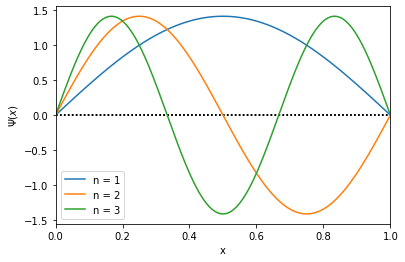

In [14]:
from wavefunction import plot_wavefunction
import matplotlib.pyplot as plt

n = [1,2,3]                   # the values of n we wish to plot
L = 1                         # set length of the box

for N in n:
    plot_wavefunction(N, L)   # plots each curve recursively
plt.show()                    # prints the graph to screen

The same plot can be created using a `while` loop

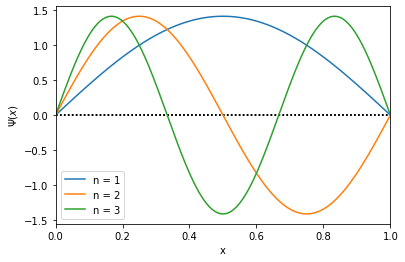

In [15]:
L = 1                         # set length of box
n = 1                         # set initial principle quantum number

while n < 4:
    plot_wavefunction(n, L)   # plots each curve recursively
    n += 1                    # increase the value of n by 1.
plt.show()                    # prints the graph to screen

What is the process occurring in the `while` loop above?

1) The variable L is assigned value 1.

2) The variable n is assigned value 1.

3) 1 < 4 is evaluated to `True` so the indented code is ran.

4) The curve for n=1 is plotted

5) The variable n is assigned value 2 (n = n + 1, where n is 1)

6) 2 < 4 is evaluated to `True` so the indented code is ran.

7) The curve for n=2 is plotted

8) The variable n is assigned value 3 (n = n + 1, where n is 2)

9) 3 < 4 is evaluated to `True` so the indented code is ran.

10) The curve for n=3 is plotted

11) The variable n is assigned value 4 (n = n + 1, where n is 3)

12) 4 < 4 is evaluated to `False` and the `while` loop is terminated

13) The graph is printed to screen.

>**Warning:** `while` loops can be very dangerous! If the variable n is not increased by one each time then this loop could run infinitely as there is **never a termination step.** It is recommended to always use a `for` loop instead of a `while` loop. 

**Exercise:** Use a `while` loop in combination with an `if` statement to plot the solutions to the particle in a box problem for n greater than 4 and less than 8, with $L=3$, using the plot_wavefunction function. 

In [16]:
### Write your code here.